## Import libraries and data

In [1]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
df = pd.read_csv('/kaggle/input/healthcare-insurance/insurance.csv')

## Data cleaning

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There is no missing value. But is there any duplicate?

In [3]:
# Check for duplicates
print('Number of duplicates: ',df.duplicated().sum())

if df.duplicated().sum()>0: 
    print(df[df.duplicated()==1])

Number of duplicates:  1
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


We should drop this duplicate record before doing any further analysis.

In [4]:
# Dropping the duplicate
df = df.drop(df[df.duplicated()==1].index, axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [5]:
# Overall statistics of numeric features
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


All statistics look okay for numeric features.

In [6]:
# obj_cols = df.select_dtypes('object').columns.to_list()
# num_cols = df.select_dtypes('int64', 'float64').columns.to_list()

# Exploratory Data Analysis

## Univariate analysis

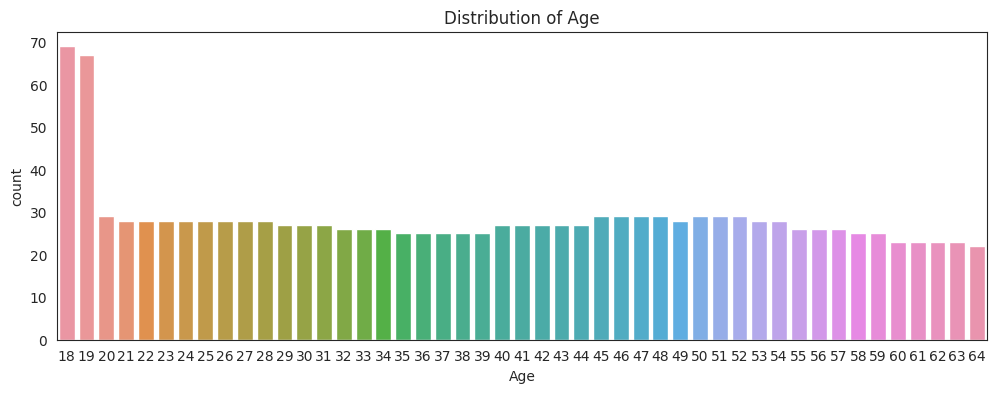

In [7]:
sns.set_palette('magma')
plt.figure(figsize=(12,4))
sns.countplot(df,x='age')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

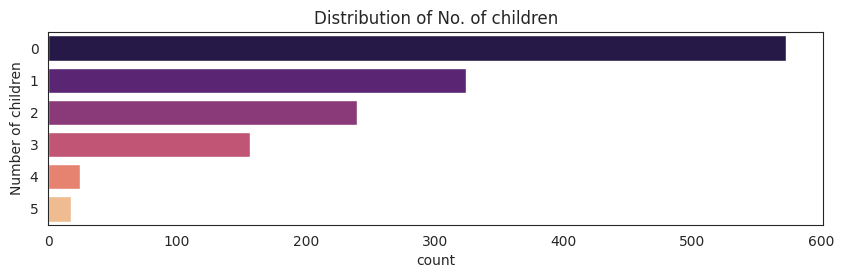

In [8]:
plt.figure(figsize=(10,2.5))
sns.countplot(df,y='children')
plt.title('Distribution of No. of children')
plt.ylabel('Number of children')
plt.show()

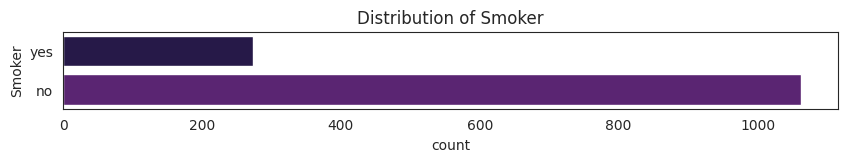

In [9]:
plt.figure(figsize=(10,1))
sns.countplot(df,y='smoker')
plt.title('Distribution of Smoker')
plt.ylabel('Smoker')
plt.show()

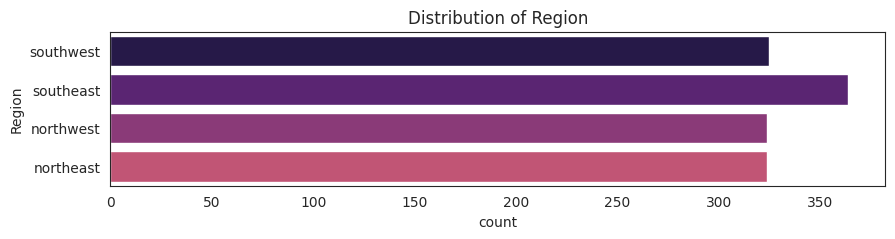

In [10]:
plt.figure(figsize=(10,2))
sns.countplot(df,y='region')
plt.title('Distribution of Region')
plt.ylabel('Region')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


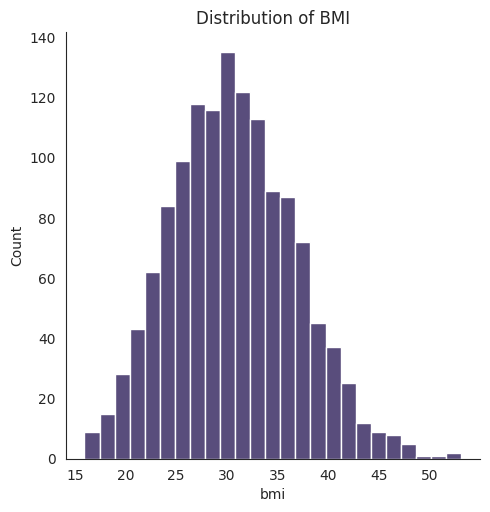

In [11]:
sns.displot(df,x='bmi')
plt.title('Distribution of BMI')
plt.show()

## Multivariate Analysis

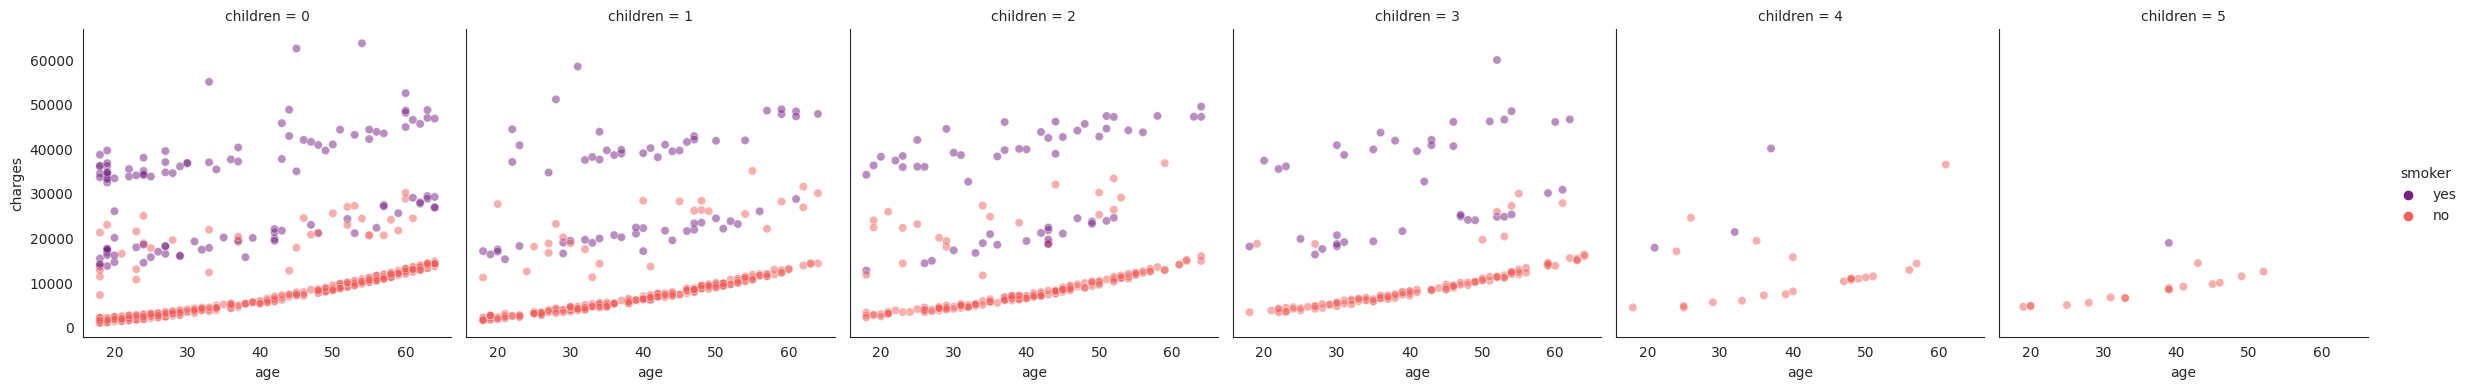

In [12]:
# Plot charges by ages and smoking status
sns.relplot(x="age", y="charges", hue="smoker",
            alpha=.5, palette="magma", col='children',
            height=4, data=df)
plt.show()

Patients with more kids have lower charges.

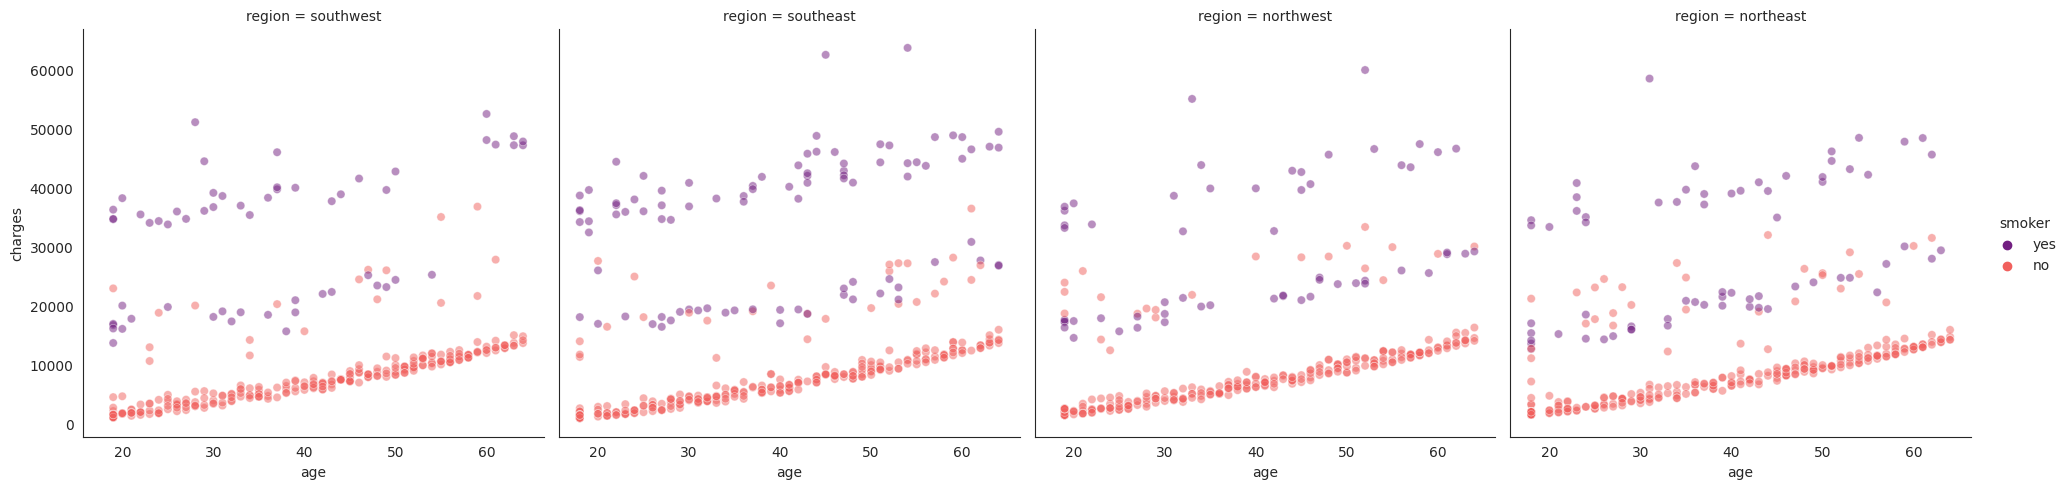

In [13]:
# Plot charges by ages, smoking status, and region
sns.relplot(x="age", y="charges", hue="smoker",
            alpha=.5, palette="magma", col='region',
            data=df)
plt.show()

There is no difference based on region.

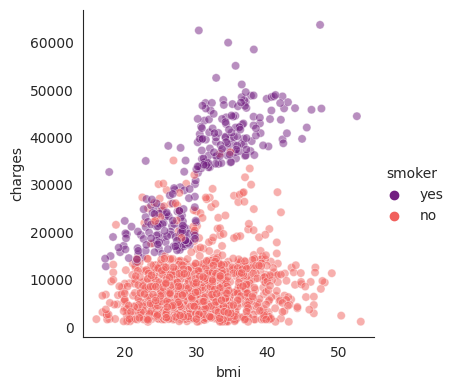

In [14]:
# Plot charges by bmi and smoking status
sns.relplot(x="bmi", y="charges", hue="smoker",
            alpha=.5, palette="magma",
            height=4, data=df)
plt.show()

For smokers, the higher their bmi, the higher the charges.

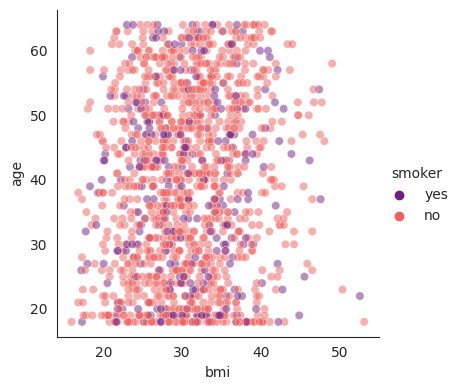

In [15]:
# Plot age by bmi and smoking status
sns.relplot(x="bmi", y="age", hue="smoker",
            alpha=.5, palette="magma",
            height=4, data=df)
plt.show()

There is no clear relationship between age, bmi and smoking status. 